importing all the packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

reading the csv + checking each column for null values

In [2]:
df = pd.read_csv('courses.csv', index_col=0)
has_nulls = df.isnull().any()
print(has_nulls)

Course_Name            False
Category               False
Duration (hours)       False
Enrolled_Students      False
Completion_Rate (%)    False
Platform               False
Price ($)              False
Rating (out of 5)      False
dtype: bool


checking for duplicates

In [3]:
course_counts = df['Course_Name'].value_counts()

duplicates = course_counts[course_counts > 1]
print(duplicates)

Series([], Name: count, dtype: int64)


outliers detection using IQR !! look for why 1.5

In [ ]:
outliers_dict = {}

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    
    outliers_dict[column] = outliers

for col, outliers in outliers_dict.items():
    print(f"Outliers for {col}:\n{outliers}\n")

box plots for every numeric variable

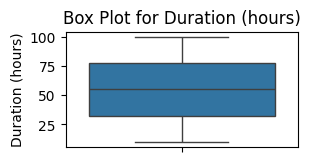

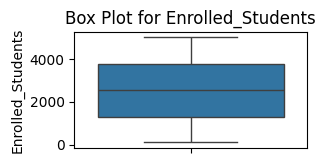

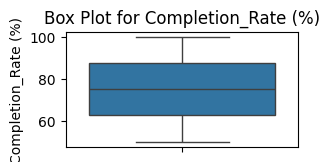

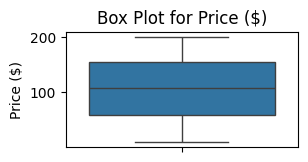

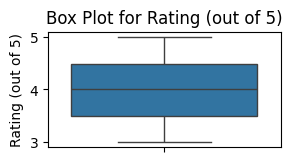

In [4]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_cols:
    plt.figure(figsize=(3, 1.5))
    sns.boxplot(y=df[column])  
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

    Perform a Chi-Square Test for Goodness of Fit on observed categorical counts.

    Parameters:
        observed_counts (list or array): The observed counts for each category.
        alpha (float): Significance level for the test (default is 0.05).

    Returns:
        dict: A dictionary containing the chi-square statistic, p-value, and test result.

function for chi_square test. used for checking the statistically significance of some data later on

In [ ]:
def chi_square_test(observed_values, alpha=0.05):

    expected_counts = [sum(observed_values) / len(observed_values)] * len(observed_values)

    chi2_stat, p_value = chisquare(f_obs=observed_values, f_exp=expected_counts)

    result = "reject the null hypothesis" if p_value < alpha else "fail to reject the null hypothesis"
    
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")

    # print(f"Observed Values: {observed_values}")
    # print(f"Expected Values: {expected_counts}")
    # print(f"Chi-Square Statistic: {chi2_stat}")
    # print(f"P-Value: {p_value}")
    # print(f"Result: {result}")
    
    return {
        f"Chi-Square Statistic: {chi2_stat}",
        f"P-Value: {p_value}",
        f"Result: {result}"
    }



starts with charts

BARCHART: count all the courses regardless of platform, taking into account only the category

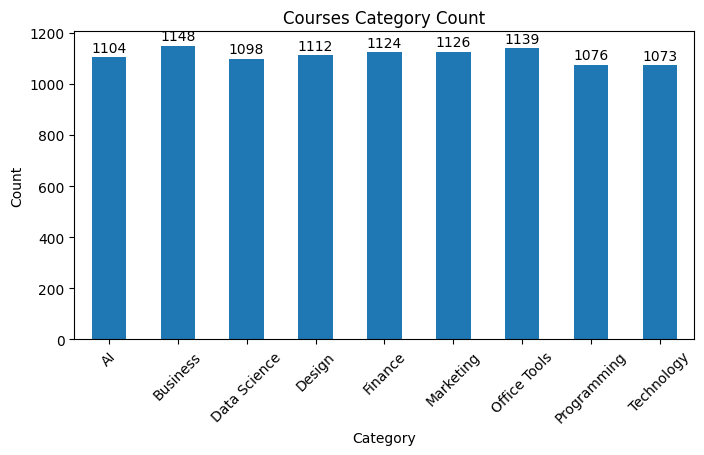

In [34]:
category = df.groupby('Category')['Category'].count()

plt.figure(figsize=(8, 4))
for i, v in enumerate(category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
category.plot(kind='bar')
plt.title('Courses Category Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test for Goodness of Fit
H₀: all categories have an equal count of courses
H₁: at least one category has a different count of courses

In [38]:
observed_counts_cat = category.values  
chi_square_test(observed_counts_cat)

{'Chi-Square Statistic: 4.8914',
 'P-Value: 0.7691179196998144',
 'Result: fail to reject the null hypothesis'}

BARCHART: avg duration for each course per category, regardeless of the platform

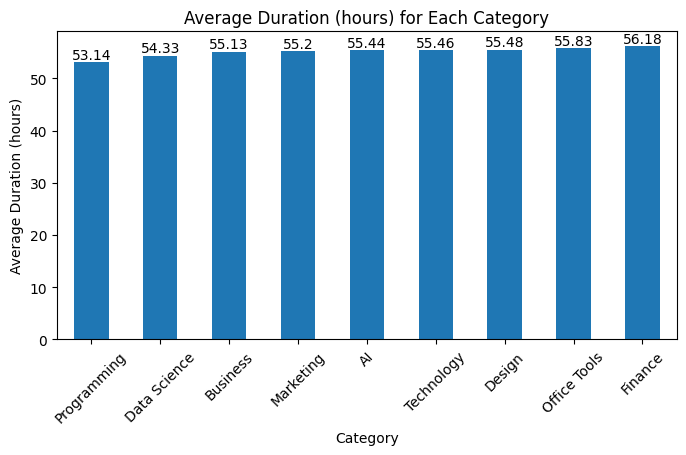

In [40]:
avg_duration_cat = df.groupby('Category')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration_cat.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_duration_cat.plot(kind='bar')
plt.title('Average Duration (hours) for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test for Goodness of Fit
H₀: all categories have a similar value for the avg duration
H₁: at least one category has a different cvalue for the avg duration

In [ ]:
observed_avg_cat = avg_duration_cat.values  
chi_square_test(observed_avg_cat)

{'Chi-Square Statistic: 0.1183717293348343',
 'P-Value: 0.999999512339227',
 'Result: fail to reject the null hypothesis'}

BARCHART: avg duration for each course per platform, regardeless of the category

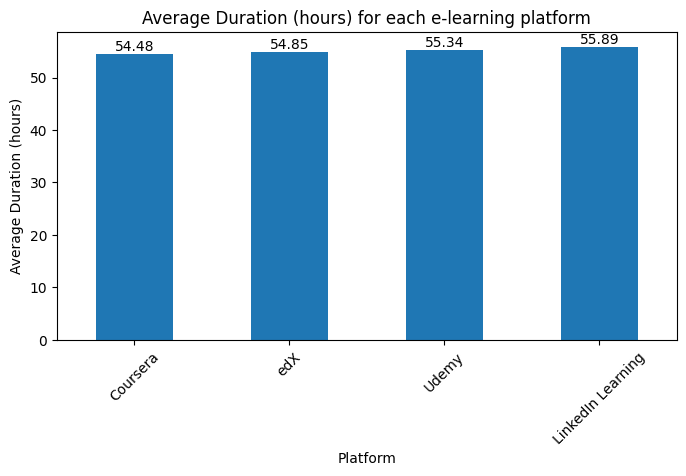

In [37]:
avg_duration_platform = df.groupby('Platform')['Duration (hours)'].mean().sort_values(ascending=True)

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_duration_platform.values):
    plt.text(i, round(v, 2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_duration_platform.plot(kind='bar')
plt.title('Average Duration (hours) for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test for Goodness of Fit
H₀: all platforms have a similar value for the avg duration
H₁: at least one platform has a different value for the avg duration

In [42]:
observed_avg_platform = avg_duration_platform.values  
chi_square_test(observed_avg_platform)

{'Chi-Square Statistic: 0.020277131376671628',
 'P-Value: 0.9992367123485226',
 'Result: fail to reject the null hypothesis'}

BARCHART: total number of students enrolled on each platform

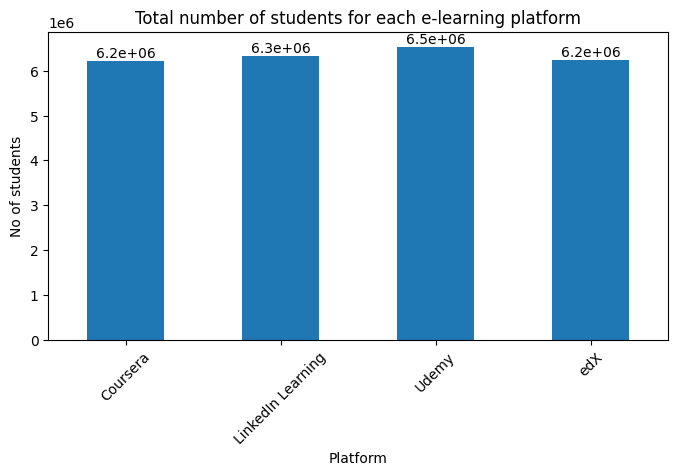

In [53]:
total_enrolled_stud = df.groupby('Platform')['Enrolled_Students'].sum()

plt.figure(figsize=(8, 4))

for i, v in enumerate(total_enrolled_stud.values):
    scientific_notation = "{:.1e}".format(v) 
    plt.text(i, v + v * 0.001, scientific_notation, ha='center', va='bottom')

total_enrolled_stud.plot(kind='bar')
plt.title('Total number of students for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('No of students')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test for Goodness of Fit
H₀: all platforms have a similar number of students
H₁: at least one platform has a different number of students

In [57]:
observed_total_students_platform = total_enrolled_stud.values  
chi_square_test(observed_total_students_platform)

Observed Values: [6212505 6323600 6538277 6232148]
Expected Values: [np.float64(6326632.5), np.float64(6326632.5), np.float64(6326632.5), np.float64(6326632.5)]
Chi-Square Statistic: 10551.426439420971
P-Value: 0.0
Result: reject the null hypothesis


{'Chi-Square Statistic: 10551.426439420971',
 'P-Value: 0.0',
 'Result: reject the null hypothesis'}

BARCHART: avg prices for each platform

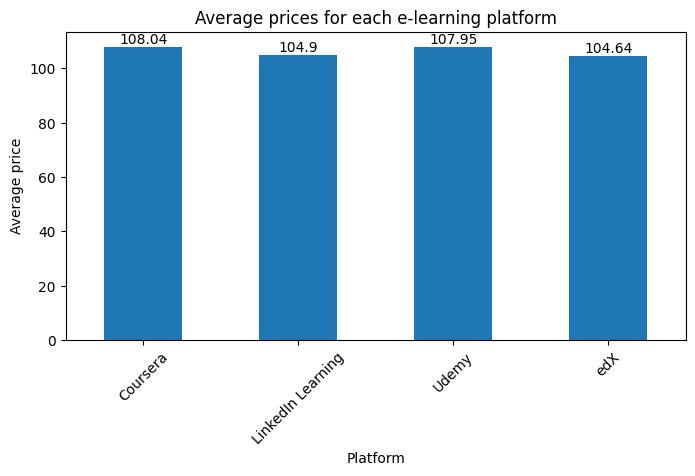

In [58]:
avg_price = df.groupby('Platform')['Price ($)'].mean()

plt.figure(figsize=(8, 4) ,linewidth=2)
for i, v in enumerate(avg_price.values):
    plt.text(i, round(v,2) + .05, str(round(v, 2)), ha='center', va='bottom')
avg_price.plot(kind='bar')
plt.title('Average prices for each e-learning platform')
plt.xlabel('Platform')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.show()

In [59]:
observed_avg_price = avg_price.values  
chi_square_test(observed_avg_price)

Observed Values: [108.04460415 104.89913915 107.95140456 104.64489218]
Expected Values: [np.float64(106.38501000991158), np.float64(106.38501000991158), np.float64(106.38501000991158), np.float64(106.38501000991158)]
Chi-Square Statistic: 0.0981685940697422
P-Value: 0.9920562902756813
Result: fail to reject the null hypothesis


{'Chi-Square Statistic: 0.0981685940697422',
 'P-Value: 0.9920562902756813',
 'Result: fail to reject the null hypothesis'}